# Lenovo Assignment2

In [1]:
#Changing working directory
import os
print(os.getcwd())
import warnings
warnings.filterwarnings('ignore')

C:\Users\alanj\Desktop\Kaggle\Lenovo


### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install statsmodels 
from statsmodels.tsa.arima_model import ARMA

### Importing data

In [3]:
data_df = pd.read_excel('DataforForecast.xlsx')
data_df = data_df[1:119]
data_df

,Unnamed: 0,Date (week beginning),Selected Period,Unnamed: 3
1,2.0,"Jan 2, 2012",13059880.0,NaN
2,3.0,"Jan 9, 2012",14076974.0,NaN
3,4.0,"Jan 16, 2012",14337217.0,NaN
4,5.0,"Jan 23, 2012",14681748.0,NaN
5,6.0,"Jan 30, 2012",14909798.0,NaN
...,...,...,...,...
114,115.0,"Mar 3, 2014",18360715.0,NaN
115,116.0,"Mar 10, 2014",18365867.0,NaN
116,117.0,"Mar 17, 2014",18415120.0,NaN
117,118.0,"Mar 24, 2014",18432161.0,NaN


In [4]:
data_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data_df.drop('Unnamed: 3', axis=1, inplace=True)

In [6]:
data_df

,Date (week beginning),Selected Period
1,"Jan 2, 2012",13059880.0
2,"Jan 9, 2012",14076974.0
3,"Jan 16, 2012",14337217.0
4,"Jan 23, 2012",14681748.0
5,"Jan 30, 2012",14909798.0
...,...,...
114,"Mar 3, 2014",18360715.0
115,"Mar 10, 2014",18365867.0
116,"Mar 17, 2014",18415120.0
117,"Mar 24, 2014",18432161.0


In [7]:
data_df.rename(columns = {'Date (week beginning)': 'date_week_beginning', 'Selected Period': 'sales_recorded'}, inplace=True)
data_df

,date_week_beginning,sales_recorded
1,"Jan 2, 2012",13059880.0
2,"Jan 9, 2012",14076974.0
3,"Jan 16, 2012",14337217.0
4,"Jan 23, 2012",14681748.0
5,"Jan 30, 2012",14909798.0
...,...,...
114,"Mar 3, 2014",18360715.0
115,"Mar 10, 2014",18365867.0
116,"Mar 17, 2014",18415120.0
117,"Mar 24, 2014",18432161.0


In [8]:
data_df.index = pd.to_datetime(data_df.date_week_beginning)

In [9]:
data_df.drop('date_week_beginning', axis=1, inplace = True)
data_df

,sales_recorded
date_week_beginning,
2012-01-02,13059880.0
2012-01-09,14076974.0
2012-01-16,14337217.0
2012-01-23,14681748.0
2012-01-30,14909798.0
...,...
2014-03-03,18360715.0
2014-03-10,18365867.0
2014-03-17,18415120.0


In [10]:
sales_recorded_df = data_df['sales_recorded']
sales_recorded_df.describe()

count    1.180000e+02
mean     1.487484e+07
std      4.633379e+06
min      5.201136e+06
25%      1.227009e+07
50%      1.441599e+07
75%      1.638053e+07
max      5.087688e+07
Name: sales_recorded, dtype: float64

### plotting data

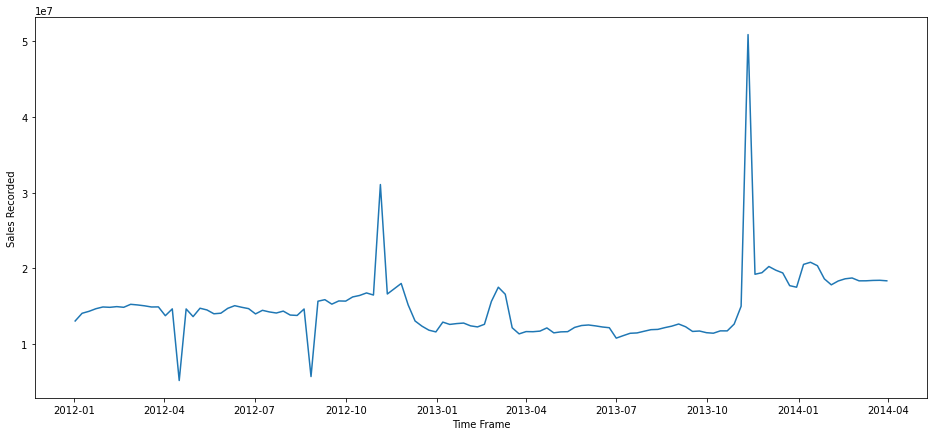

In [11]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Sales Recorded')
ax1.plot(sales_recorded_df)

### Normalizing the anomalies

In [12]:
from sklearn.ensemble import IsolationForest

ts = data_df['sales_recorded']

# Create an isolation forest model
model = IsolationForest(contamination=0.05)
model.fit(ts.values.reshape(-1,1))
anomalies = model.predict(ts.values.reshape(-1,1))

# Normalize the anomalies by replacing them with the mean of the time series
ts[anomalies == -1] = ts.mean()
sales_recorded_df = ts

### Checking stationarity

`Stationarity` is a statistical property of a time series, in which the statistical properties (such as mean, variance, and autocorrelation) do not change over time. In other words, a time series is said to be stationary if its statistical properties are constant over time.

It is important to check for stationarity because many `time series analysis techniques assume that the data is stationary`. For example, the popular ARIMA model for forecasting time series data assumes that the data is stationary. If the data is non-stationary, the model will not work well and the forecasts will be inaccurate. Additionally, many statistical tests for determining the presence of a trend or seasonality in a time series also assume stationarity. Therefore, checking for stationarity is an important step in time series analysis to ensure that the techniques used are appropriate for the data.


`Rolling Statistics`, `Duckey fuller` are popular methods to check stationarity in the time series data.

### Determing rolling statistics

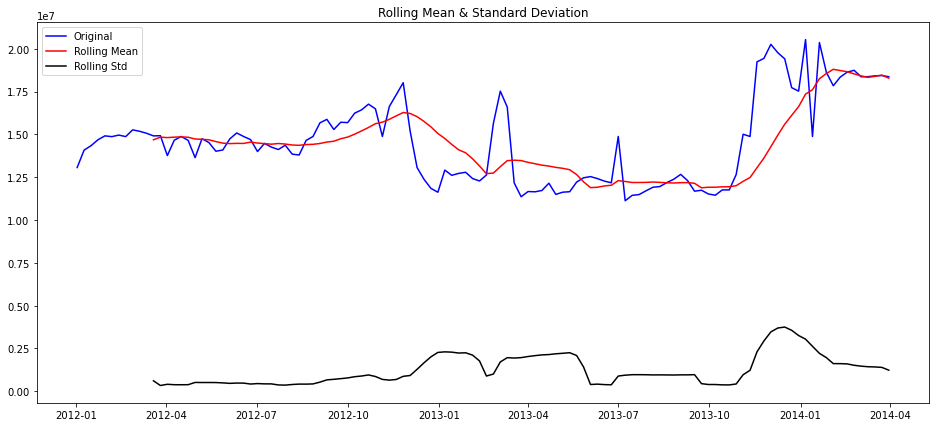

In [14]:

rolLmean = sales_recorded_df.rolling(12).mean()
rolLstd = sales_recorded_df.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(sales_recorded_df, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [15]:
# Perform Augmented Dickey-Fuller test:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
from statsmodels.tsa.stattools import adfuller
ts = data_df['sales_recorded']
adfuller_result = adfuller(ts, autolag='AIC')
print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.9946905325403417
p-value: 0.2889059572139952
Critial Values:
   1%, -3.4880216384691867
Critial Values:
   5%, -2.8867966864160075
Critial Values:
   10%, -2.5802408234244947


### making series stationary

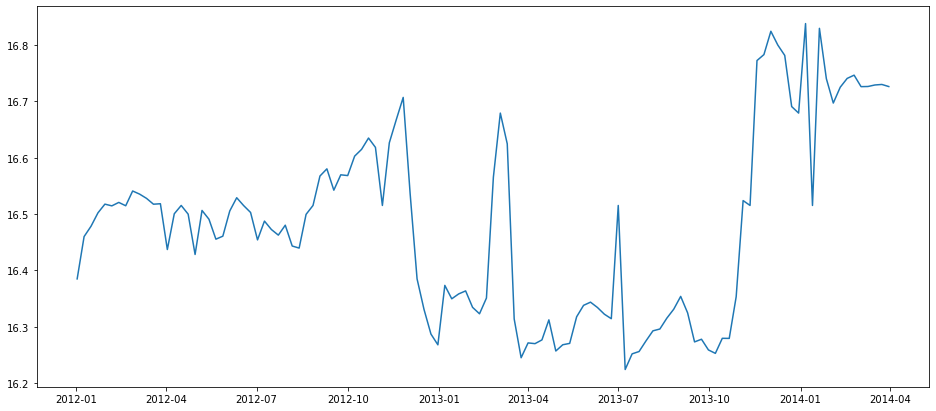

In [16]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(sales_recorded_df)
plt.plot(ts_log)

### Decomposition

`Decomposition` in time series analysis refers to the process of breaking down a time series into its individual components, such as trend, seasonality, and residuals (also known as noise or random error). This can be useful for understanding the underlying structure of the time series, as well as for identifying patterns and trends that may not be immediately apparent from the raw data.

There are several different methods for decomposing a time series, but one of the most commonly used is the additive decomposition method. This method separates the time series into three components:

`Trend`: The long-term direction of the data, such as an upward or downward trend.
`Seasonality`: The repeating patterns in the data, such as daily, weekly, or annual cycles.
`Residuals`: The random error or noise in the data that is not explained by the trend or seasonality.
Once the time series has been decomposed, it can be easier to identify patterns and trends, and to make predictions about future values. For example, if the trend is upward, we can expect the series to continue to increase over time. Additionally, by removing the seasonal component, we can make fairer comparison between different points in time.

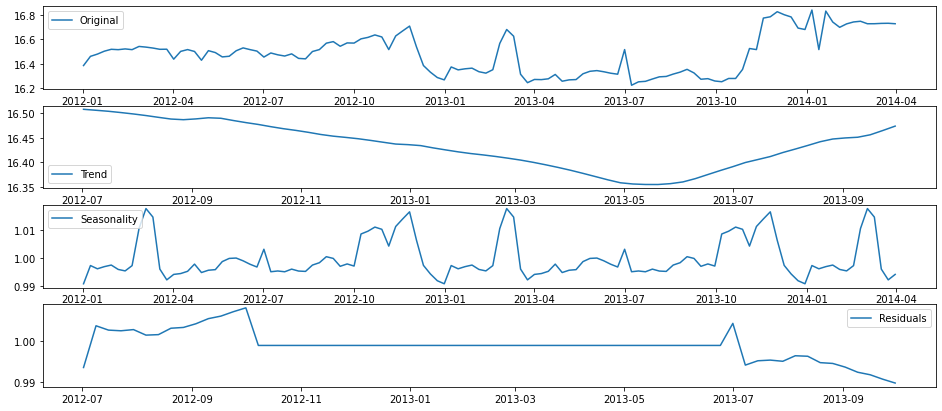

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

### differencing
`Differencing` is a technique used in time series analysis to make a time series stationary. A time series is said to be stationary if the statistical properties (such as mean, variance, and autocorrelation) do not change over time. However, many real-world time series data, such as stock prices, temperature, or sales data, are non-stationary, meaning that they do have a trend or seasonality. Differencing can be used to remove this trend and make the data stationary.

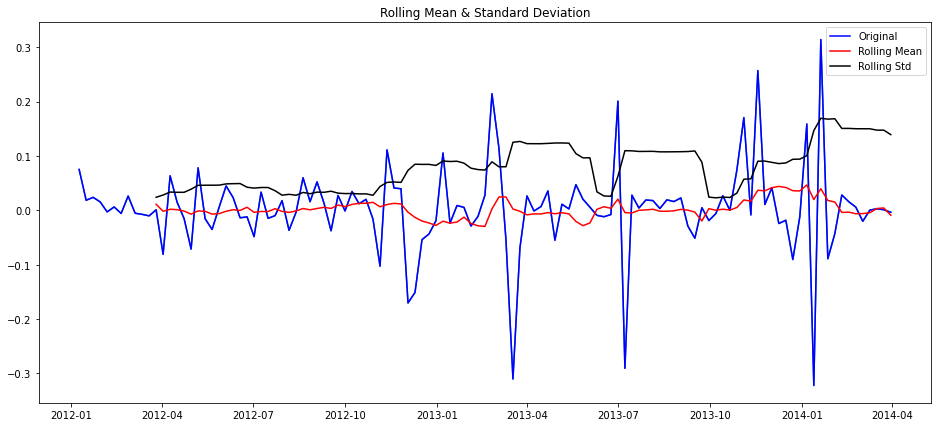

In [18]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()

#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [19]:
sales_recorded_df.sort_index(inplace= True)

`ACF (Autocorrelation Function)` and `PACF (Partial Autocorrelation Function)` are two related measures used in time series analysis to understand the correlation structure of a time series.



In [20]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

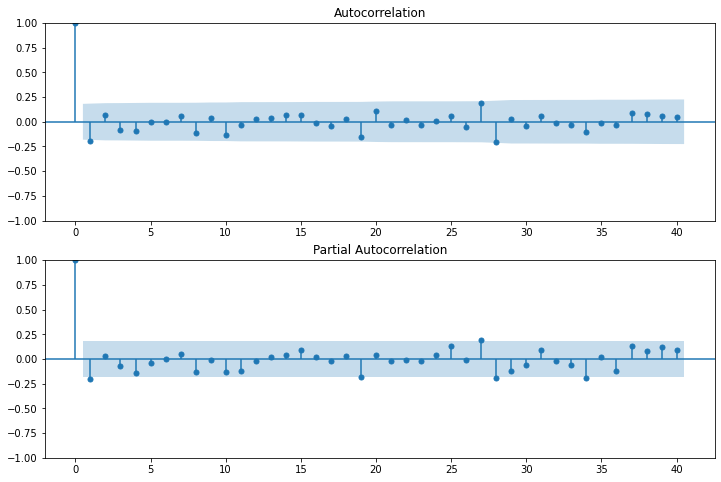

In [21]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [22]:
from statsmodels.tsa.arima.model import ARIMA

In [23]:
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

C:\anaconda3\envs\KV7006\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\anaconda3\envs\KV7006\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\anaconda3\envs\KV7006\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


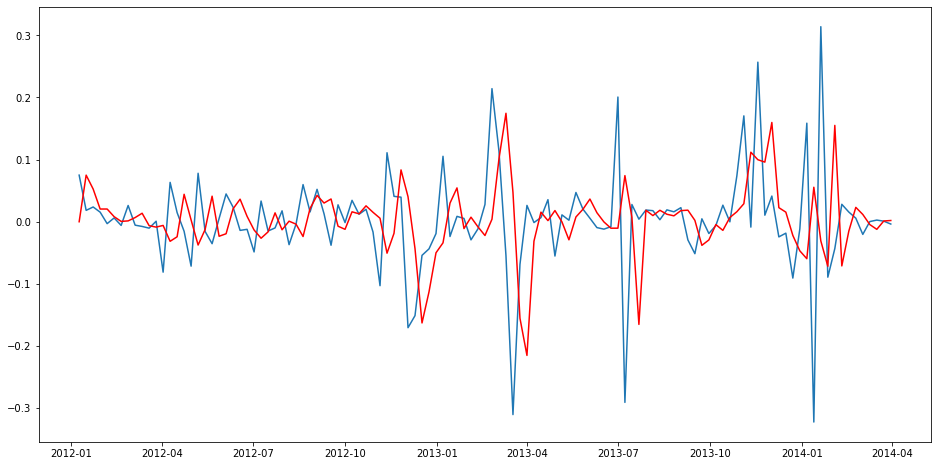

In [24]:
plt.figure(figsize=(16,8))
model = ARIMA(ts_log_diff, order=(1,1,0))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

### Taking results back to original scale

In [25]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

date_week_beginning
2012-01-09    0.000000
2012-01-16    0.074995
2012-01-23    0.052662
2012-01-30    0.020457
2012-02-06    0.020463
dtype: float64


In [26]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

date_week_beginning
2012-01-09    0.000000
2012-01-16    0.074995
2012-01-23    0.127657
2012-01-30    0.148114
2012-02-06    0.168577
dtype: float64


In [27]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

date_week_beginning
2012-01-02    16.385055
2012-01-09    16.385055
2012-01-16    16.460051
2012-01-23    16.512713
2012-01-30    16.533170
dtype: float64

Text(0.5, 1.0, 'RMSE: 1465496.2345')

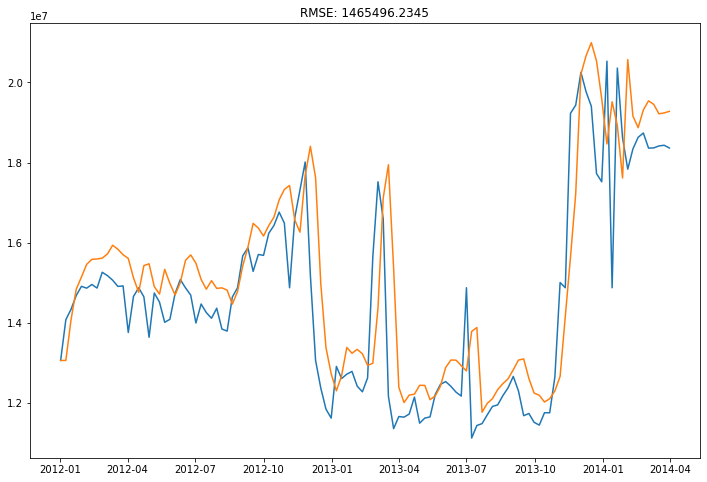

In [28]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(sales_recorded_df)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-sales_recorded_df)**2)/len(sales_recorded_df)))

In [40]:
results_ARIMA.predict(1, 50)

2012-01-16    0.074995
2012-01-23    0.052662
2012-01-30    0.020457
2012-02-06    0.020463
2012-02-13    0.008136
2012-02-20    0.000556
2012-02-27    0.001365
2012-03-05    0.006715
2012-03-12    0.013676
2012-03-19   -0.006321
2012-03-26   -0.008645
2012-04-02   -0.005931
2012-04-09   -0.031471
2012-04-16   -0.024201
2012-04-23    0.044183
2012-04-30    0.002869
2012-05-07   -0.037480
2012-05-14   -0.012562
2012-05-21    0.041135
2012-05-28   -0.023357
2012-06-04   -0.019321
2012-06-11    0.020833
2012-06-18    0.036330
2012-06-25    0.008700
2012-07-02   -0.013239
2012-07-09   -0.026537
2012-07-16   -0.016316
2012-07-23    0.014296
2012-07-30   -0.012958
2012-08-06    0.000905
2012-08-13   -0.003882
2012-08-20   -0.023791
2012-08-27    0.021331
2012-09-03    0.042424
2012-09-10    0.030101
2012-09-17    0.036620
2012-09-24   -0.007191
2012-10-01   -0.012185
2012-10-08    0.015980
2012-10-15    0.012761
2012-10-22    0.025600
2012-10-29    0.015173
2012-11-05    0.005624
2012-11-12 

In [ ]:
!pip install pmdarima

In [31]:
!pip install --upgrade numpy

### auto_arima

In [32]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [33]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-243.999, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-247.265, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-249.933, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-249.682, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-249.120, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-248.026, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-248.089, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-246.095, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-251.730, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-249.833, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-249.898, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-251.470, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-247.902, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.354 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)